<a href="https://colab.research.google.com/github/lmeneses7/Final_Examen/blob/pca/Examen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instrucciones

**El examen puede ser realizado en grupo de tres personas, sin embargo, cada integrante crear y ejecutar las tareas de actualización en su GitHub.**

A continuación, se encuentran las instrucciones para el desarrollo del examen de nuestro curso de Ciencias de Datos para la Economía, el cual es parte de su portfolio.

**Objetivo**: Que el/la estudiante utilice las herramientas de Git y posteriormente publicar su primer proyecto de ciencias de datos en GitHub.

A continuación encontrará el dataset **ingresos.txt** en la carpeta de **Datos**, el cual contiene información de variables que buscan predecir los ingresos anuales de los encuestados utilizando datos de encuestas de 1990.

El dataset tiene 1.816 filas y 14 columnas. A continuación se describen las columnas:

- estatura: Unidad de medida centímetros
- peso: Unidad de medida kilogramos
- genero
- ingresos: en dólares
- etnia: etnia en EE.UU.
- educacion: en años
- educacion_madre: en años
- educacion_padre: en años
- Camina: Camina al trabajo
  - 1: Nunca
  - 2: Una vez al mes o menos
  - 3: Alrededor de dos veces al mes
  - 4: Alrededor de una veces a la semana
  - 5: Dos veces a la semana
  - 6: Tres veces a la semana
  - 7: Mas de tres veces a la semana
  - 8: Todos los días
- ejercicio: días de la semana que practica ejercicios
- fumador: Fuma 7 cigarros o más a la semana
  - 1: Si
  - 2: No
- tenso: días de la semana en dicho estado
- malhumorado: : días de la semana en dicho estado
- edad: en años



**Tareas solicitadas:**

Con el set de datos  ingresos.txt, debe realizar las siguientes actividades tanto en Python, Git y GitHub.:

- Crear carpeta donde va a trabajar su proyecto


- Inicializar su proyecto en git

  **`git init`**

- Crear un cuaderno de jupyter notebook, ya sea en colab o en su computador, para realizar su actividad.


- Crear un archivo con nombre README.md
touch README.md

- Describa su proyecto en el archivo README.md utilizando lenguaje markdown o latex. Puede usar como ayuda gráfica la página web indicada en las slices vistas en clase.

- Realizar un análisis descriptivos y visualización de datos: Debe realizar tareas tales como, descripción de los datos, transformaciones en caso de ser necesario, imputación, entro otras.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Crear un repositorio remoto en GitHub con el nombre Ciencias de Datos:

- Conectarse desde su computador al repositorio remoto. No olvide enlazar su computador.
git remote add origin https://github.com/nombre_usuario/nombre_repositorio.git

  Otra alternativa es realizar el proyecto usanod colab.

- Crear rama principal en su computador

  **`git branch -M main`**

- Agregar cuaderno de jupyter a repositorio remoto

  **`git push -u origin main`**

- Crear nueva rama para la segunda parte del Proyecto.

  **`git branch`**

- Moverse a nueva rama para la segunda parte del Proyecto.

  **`git checkout`**

- Continuar con su tarea en jupyter notebook. Ahora deberá aplicar reducción de dimensionalidad usando el algoritmo PCA. No es necesario que realice los test estadístico, solamente explicarlos e indicar que se cumplen los supuestos.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Moverse a la rama principal y realizar merge a la rama creada.

  **`git merge`**

- Actualizar la rama principal de su repositorio remoto y agregar la rama creada

  **`git push origin main`**

  **`git push origin nombre_rama_2`**


- Finalmente, cada integrante debe agregar la url de su proyecto en el aulavirtual

**Fecha Entrega: Domingo 15 de Diciembre de 2024, 23:00 hrs.**


**Nota 1:** Los códigos y pasos indicados deben ser utilizados como referencia, ya que es posible que algún paso o comandos no se hayan indicado.

**Nota 2**: En caso de que no pueda generar el proyecto con las ramas solicitadas, puede cargar el proyecto con un solo push.

## **Colab y Github**

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
!git clone https://github.com/lmeneses7/Final_Examen
%cd Final_Examen

Cloning into 'Final_Examen'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 12 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 4.11 KiB | 4.11 MiB/s, done.
/content/Final_Examen


In [21]:
#@title Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#@title Carga de Datos
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos para Economía/ingresos-1.txt', sep='\t')
data = data.dropna() #quitamos las observaciones con valores nulos.

In [ ]:
#@title Resumen Estadístico
print(data.describe())


## **Limpieza  y Transofrmación de Datos**

In [12]:
#Convertiremos la columna "genero" en valores dummy
data['genero'] = data['genero'].replace({'masculino': 1, 'femenino': 0})
data['etnia'] = data['etnia'].replace({'Blanco': 1, 'Other': 0, 'Afroamericano':3, 'Latino':4})
print(data['etnia'].unique())

[1 0 3 4]


## **Análisis Exploratorio**


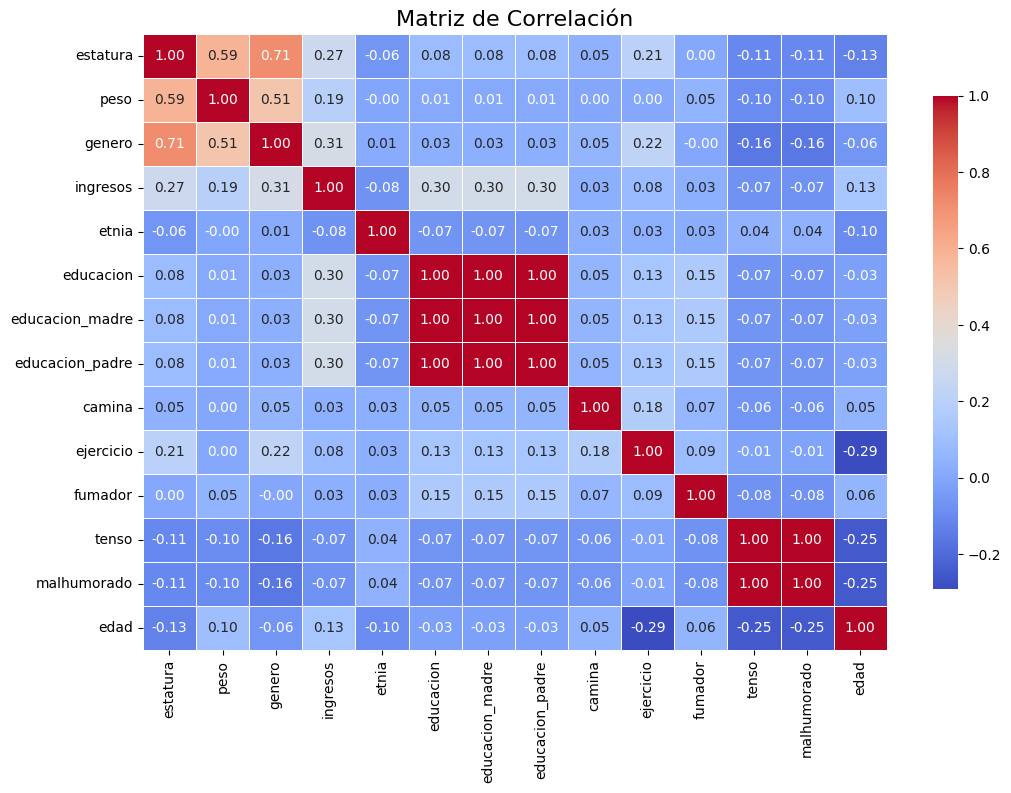

In [13]:
#@title Correlaciones
# Crear la matriz de correlación
correlation_matrix = data.corr()

#configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

#Realizamos el heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

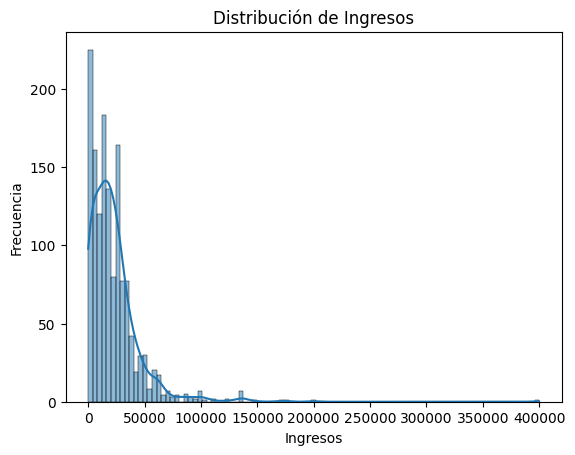

In [14]:
#@title Distribucion de Ingresos
sns.histplot(data['ingresos'], kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='genero', ylabel='ingresos'>

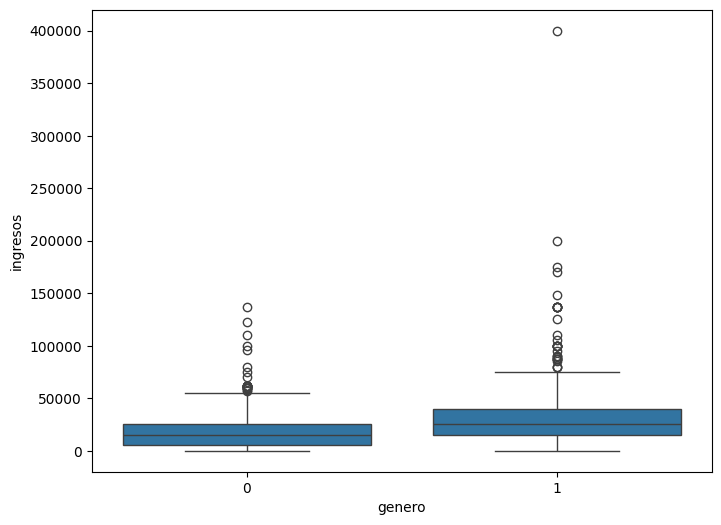

In [15]:
#@title Boxplot de los Ingresos por Género
plt.figure(figsize=(8, 6))
sns.boxplot(x='genero', y='ingresos', data=data)


## **PCA - Reducción de Dimensionalidad**


In [33]:
#@title Analísis PCA
#Seleccionamos las columnas númericas.
features = ['estatura', 'peso','educacion','ejercicio','edad', 'ingresos','peso','etnia', 'educacion_madre','educacion_padre',	'camina']

#Escalamiento de los datos
scaler = StandardScaler()
x = scaler.fit_transform(data[features])

In [34]:
#@title Aplicamos PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Verificar los nuevos datos
print(pca_df.head())

        PC1       PC2
0  2.623403  2.391792
1  1.801051 -1.358846
2  1.235304 -1.843603
3  1.490726 -2.156172
4  3.141925 -0.251312


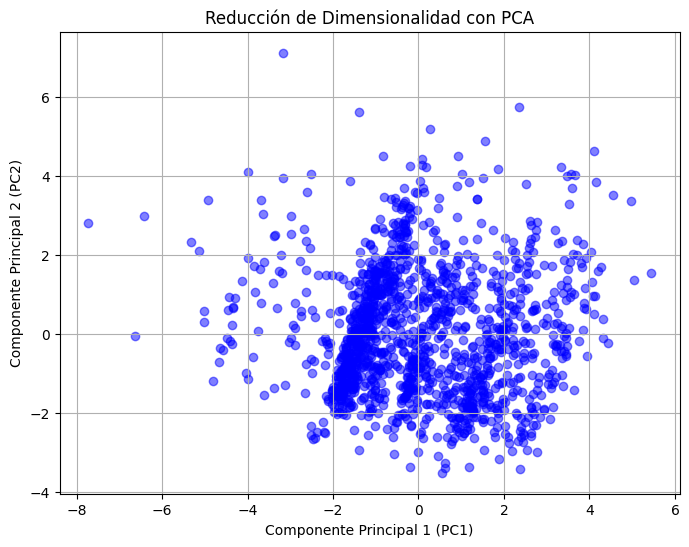

In [35]:
#@title Visualización
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.5)
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid()
plt.show()

#En el README en la rama pca del github, se encuentra los supuestos que cumple.

## Supuestos del PCA y su verificación

### 1. Linealidad

PCA asume que las variables tienen *relaciones lineales entre sí*. Esto significa que las combinaciones lineales de las variables originales pueden explicar la varianza en los datos.

En este caso:

- Las variables seleccionadas (estatura, peso, educacion, edad, etc.) son numéricas y tienen relaciones lineales entre sí.
- La *matriz de correlación* generada previamente muestra coeficientes de correlación positivos y negativos, lo cual confirma que existen relaciones lineales.

---

### 2. Datos numéricos

PCA solo trabaja con *datos numéricos*. Las variables categóricas deben transformarse antes de aplicar PCA.

En este caso:

- La columna genero fue transformada a valores binarios:
   - Masculino = 1, Femenino = 0.
- La columna etnia fue codificada numéricamente:
   - Blanco = 1, Other = 0, Afroamericano = 3, Latino = 4.

Por lo tanto, todas las columnas utilizadas en el análisis PCA son numéricas.

---

### 3. Varianza máxima

PCA busca capturar la *máxima varianza* en los datos, por lo que es importante que las variables sean *escaladas* a la misma escala.

En este caso:

- Se utilizó StandardScaler para escalar las variables antes de aplicar PCA.
- El escalamiento asegura que todas las variables tengan *media 0* y *desviación estándar 1*, eliminando la influencia de las unidades o magnitudes originales.

El escalamiento previo garantiza que la varianza capturada por PCA no se vea afectada por las diferencias en la escala de las variables.

---

### 4. Independencia de componentes

PCA genera *componentes principales ortogonales, es decir, linealmente **independientes* entre sí. Cada componente captura información única de los datos.

En este caso:

- Los componentes principales PC1 y PC2 tienen varianzas explicadas *separadas*:
   - PC1 explica el *25.63%* de la varianza total.
   - PC2 explica el *18.60%* de la varianza total.
- La independencia entre componentes está garantizada por la naturaleza misma del algoritmo PCA.

---

### 5. Escalamiento

El *escalamiento* de las variables es un requisito fundamental para PCA, ya que permite que todas las variables tengan la *misma importancia* en el análisis.

En este caso:

- Se aplicó StandardScaler para realizar el escalamiento previo a PCA.
- El resultado muestra que los datos están *centrados en 0* y tienen una *desviación estándar de 1*, cumpliendo con el requisito de escalamiento.

---

## **Modelo de Predicción**

In [38]:
X = data[['educacion', 'edad', 'peso', 'estatura','etnia', 'educacion_madre','educacion_padre',	'camina']]  # Variables predictoras
y = data['ingresos']  # Variable objetivo

#division train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenar el modelo.
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#evaluación del modelo
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Error cuadrático medio (MSE): 759833878.2292562
R^2 Score: 0.12532144977864434


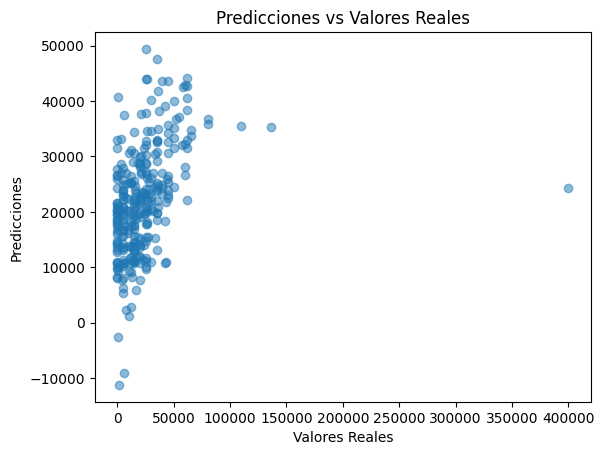

In [39]:
#@title Visualización del Modelo
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

## Interpretación del Modelo de Regresión Lineal

### Métricas de Evaluación
1. **Error Cuadrático Medio (MSE):** 75983878.2292562  
   - El MSE indica el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un valor más bajo es deseable, pero en este caso es bastante alto, lo que sugiere que el modelo no predice con mucha precisión.

2. **R^2 Score:** 0.1253214497786434  
   - El R² mide la proporción de la variabilidad de la variable objetivo que el modelo puede explicar. Un valor cercano a 1 indica un buen ajuste, mientras que un valor cercano a 0 indica un bajo poder predictivo. Aquí, con un valor de aproximadamente **0.12**, el modelo apenas captura el 12.5% de la variabilidad de los ingresos.

---

### Interpretación General
El rendimiento del modelo de regresión lineal es limitado. El **R² bajo** y el **MSE elevado** sugieren que las variables predictoras (`educacion`, `edad`, `peso`, `altura`, etc.) no logran explicar adecuadamente la variación en los ingresos. Esto podría deberse a:

1. **Relaciones no lineales** entre las variables predictoras y la variable objetivo.
2. **Falta de variables relevantes**: Es posible que existan otros factores importantes que no se han incluido en el modelo.
3. **Outliers** o valores extremos: Como se observa en la gráfica, existen valores atípicos con ingresos muy altos que no se ajustan bien al modelo.

---

### Visualización del Modelo
La gráfica de **"Predicciones vs Valores Reales"** revela que:
- La mayoría de los datos reales se concentran en valores bajos de ingresos.
- Las predicciones se dispersan de forma irregular, mostrando poca alineación con los valores reales.
- Esto refuerza la idea de que el modelo no está capturando bien la relación subyacente.





In [40]:
#@title Análisis de Outliers con el Método Tukey

# Función para calcular límites de Tukey
def calcular_limites_tukey(frame, variable):
    q1 = frame[variable].quantile(0.25)
    q3 = frame[variable].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return {'limite_inferior': limite_inferior, 'limite_superior': limite_superior}

# Calcular límites de Tukey para variables numéricas
valores_tukey = {}
for columna in data.select_dtypes(include=['float64', 'int64']).columns:
    valores_tukey[columna] = calcular_limites_tukey(data, columna)

# Convertir resultados a DataFrame
limites_tukey_df = pd.DataFrame(valores_tukey).T
print("Límites de Tukey para las variables numéricas:")
print(limites_tukey_df)

Límites de Tukey para las variables numéricas:
                 limite_inferior  limite_superior
estatura                 139.700          200.660
peso                      28.355          109.995
genero                    -1.500            2.500
ingresos              -27500.000        64500.000
etnia                      1.000            1.000
educacion                  6.000           22.000
educacion_madre            6.000           22.000
educacion_padre            6.000           22.000
camina                    -4.500           15.500
ejercicio                 -6.500           13.500
fumador                    1.375            2.375
tenso                     -3.000            5.000
malhumorado               -3.000            5.000
edad                      -4.000           84.000


In [46]:

#@title Clasificación de Valores como Outliers

# Función para clasificar valores como outliers
def clasificar_outlier(frame, variable):
    limites = calcular_limites_tukey(frame, variable)
    frame['outlier_' + variable] = frame[variable].apply(
        lambda x: 'outlier' if x < limites['limite_inferior'] or x > limites['limite_superior'] else 'no_outlier'
    )

# Clasificar outliers para todas las variables numéricas
for columna in data.select_dtypes(include=['float64', 'int64']).columns:
    clasificar_outlier(data, columna)

# Resumen de outliers
outliers_resumen = {col: data['outlier_' + col].value_counts().get('outlier', 0) for col in data.select_dtypes(include=['float64', 'int64']).columns}
outliers_resumen_df = pd.DataFrame(outliers_resumen.items(), columns=['Variable', 'Outliers'])

print("\nResumen de outliers por variable:")
print(outliers_resumen_df)


Resumen de outliers por variable:
           Variable  Outliers
0          estatura         0
1              peso        24
2            genero         0
3          ingresos        52
4             etnia       233
5         educacion         3
6   educacion_madre         3
7   educacion_padre         3
8            camina         0
9         ejercicio         0
10          fumador       360
11            tenso       129
12      malhumorado       129
13             edad         6


In [48]:
#@title Ajuste de Valores Extremos

# Ajustar valores extremos en ingresos
percentil_99 = data['ingresos'].quantile(0.99)
data['ingresos'] = data['ingresos'].clip(upper=percentil_99)

# Verificar ajuste
print("Ingresos después del ajuste:")
print(data['ingresos'].describe())


Ingresos después del ajuste:
count      1440.000000
mean      21830.829167
std       20071.079999
min           0.000000
25%        7000.000000
50%       17800.000000
75%       30000.000000
max      110000.000000
Name: ingresos, dtype: float64


<Figure size 1600x1200 with 0 Axes>

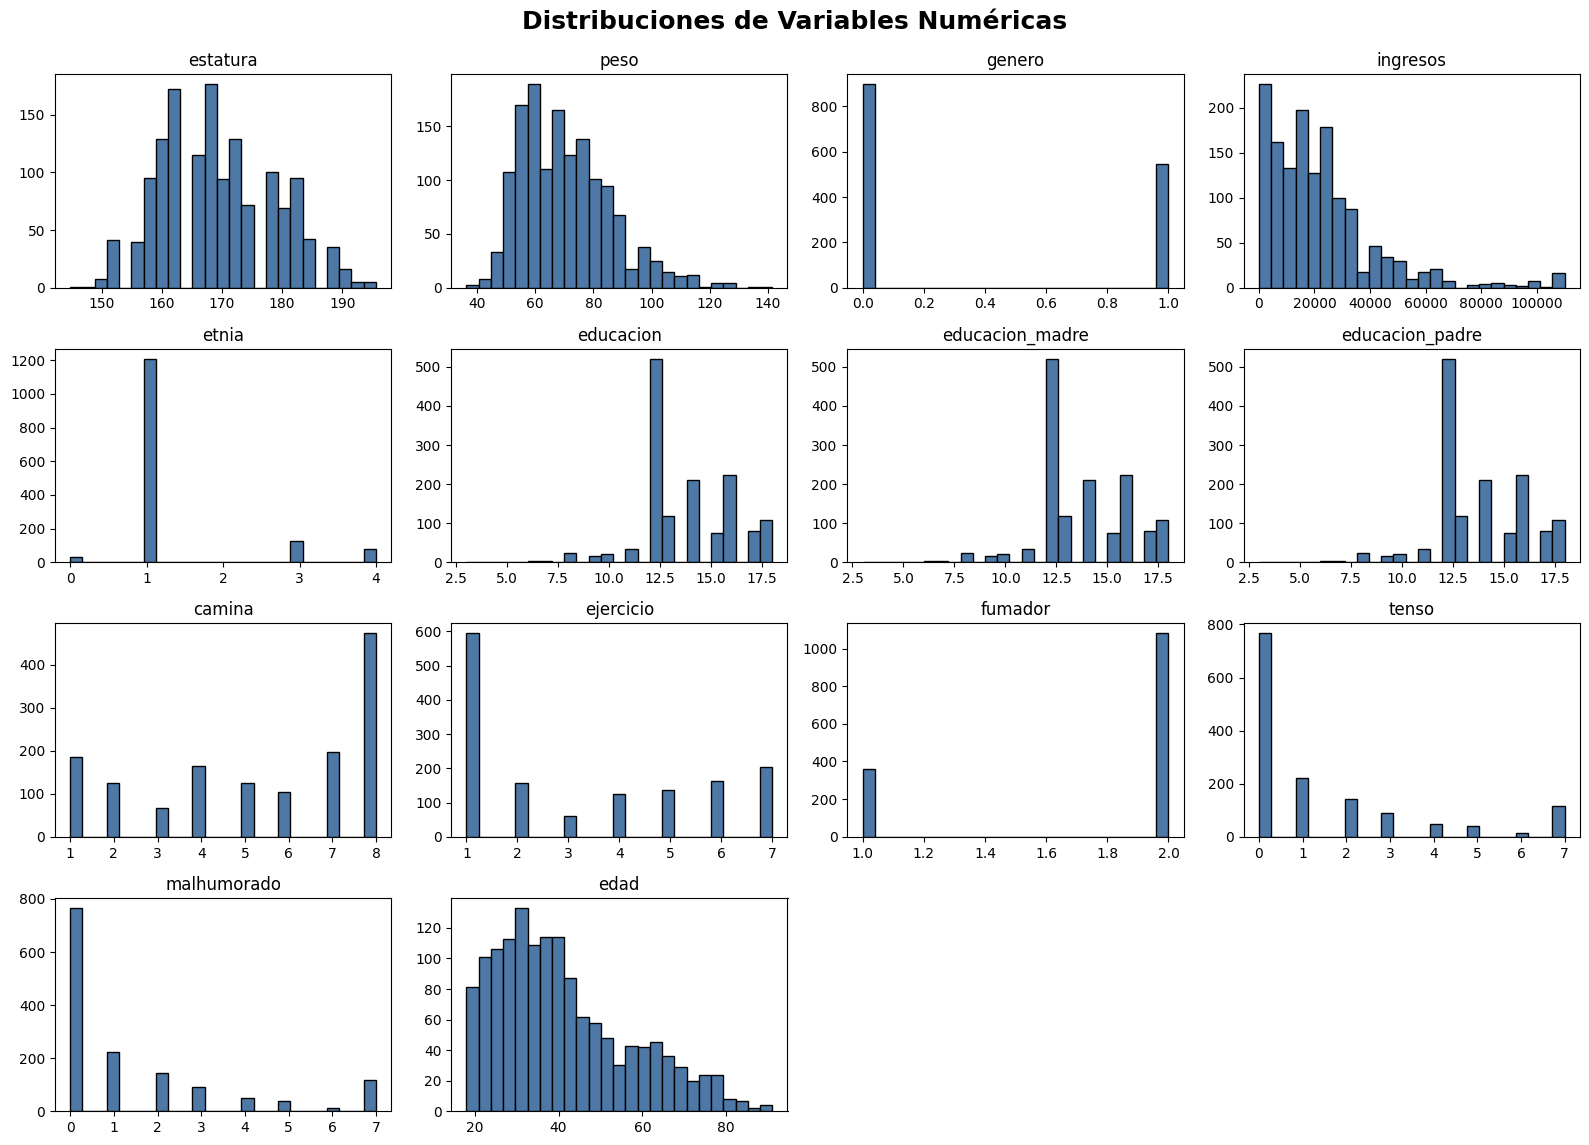

In [50]:
#@title Distribución de Variables Numéricas

# Crear histogramas para visualizar distribuciones con mejoras estéticas
plt.figure(figsize=(16, 12))
data.hist(
    bins=25,                  # Ajustar el número de bins para mayor detalle
    figsize=(16, 12),         # Tamaño del gráfico
    color='#4E79A7',          # Color de las barras
    edgecolor='black',        # Color del borde de las barras
    grid=False                # Desactivar la cuadrícula
)

# Agregar un título principal al gráfico
plt.suptitle(
    "Distribuciones de Variables Numéricas",
    fontsize=18,
    fontweight='bold',
    y=0.95
)

# Ajustar diseño y mostrar los histogramas
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
